# Udacity Nanodegree Program, Data Analyst

## Project_3: Data Analysis

## Dataset:   Titanic 


### General question: 
What are the significant factors/characteristics of survivors?
            
### Sub-questions:
Did have childrens and womans better chances to survive? (Check if the line from Titanic ["Women and childrens first!"] has some real support.)           
Did people with better social status (higher class) had better probability of survival?

## Data Wrangling

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading data file from csv
data_df = pd.read_csv("titanic-data.csv")

# initial data exploration
print (data_df.head()) 
print ("")
print (data_df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

 

After quick check one can notice different count in Age columns, which means there are more than 150 entries missing. Cabin column also contains some NaNs which is clear from printing the head. From my point of view there are few poorly usefull features and thus I am going to remove them.

## Data Cleaning

In [2]:
# counts NaN in every column
count_nan = data_df.isnull().sum()
print count_nan

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Deleted features:<br>
Name - just duplicates the PassengerID column,<br>
Cabin - 687 out of 893 values are NaNs<br>
Embarked - I assume that port of embarkation has not any significant affect whether passenger survive or not

In [3]:
def drop_features(df):
    return df.drop(["Name", "Cabin", "Embarked"], axis=1)
data_df = drop_features(data_df)

Next, I have to solve the problem with NaN values. After I removed Cabin and Embarked features, there are NaN values only in Age column now. As I do not want to loose the data in my sample I perform a transformation of the feature into groups by filling of the all NaN values by negative integer and then group the values according to age. 

In [4]:
def transform_age(df):
    df["Age"] = df["Age"].fillna(-1)
    bins = [-2, 0, 3, 10, 18, 30, 60, 120]
    groups = ["Unknown", "Baby", "Child", "Young", "Younger Adult", "Older Adult", "Senior"]
    cut = pd.cut(df["Age"], bins, labels=groups)
    df["Age"] = cut
    return df

transform_age(data_df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,male,Younger Adult,1,0,A/5 21171,7.2500
1,2,1,1,female,Older Adult,1,0,PC 17599,71.2833
2,3,1,3,female,Younger Adult,0,0,STON/O2. 3101282,7.9250
3,4,1,1,female,Older Adult,1,0,113803,53.1000
4,5,0,3,male,Older Adult,0,0,373450,8.0500
5,6,0,3,male,Unknown,0,0,330877,8.4583
6,7,0,1,male,Older Adult,0,0,17463,51.8625
7,8,0,3,male,Baby,3,1,349909,21.0750
8,9,1,3,female,Younger Adult,0,2,347742,11.1333
9,10,1,2,female,Young,1,0,237736,30.0708


Also I would like to mark babies and childrens (10 years old and younger) in Sex feature as I believe the sex did not have any significant impact on survival rate in those age categories.

In [5]:
data_df2 = data_df.copy()
data_df2.loc[data_df2["Age"] == ("Baby" or "Child"), "Sex"] = "child"

## Data Exploration
Getting some more intuition about the data with focus on features mentioned in questions at the beginning.

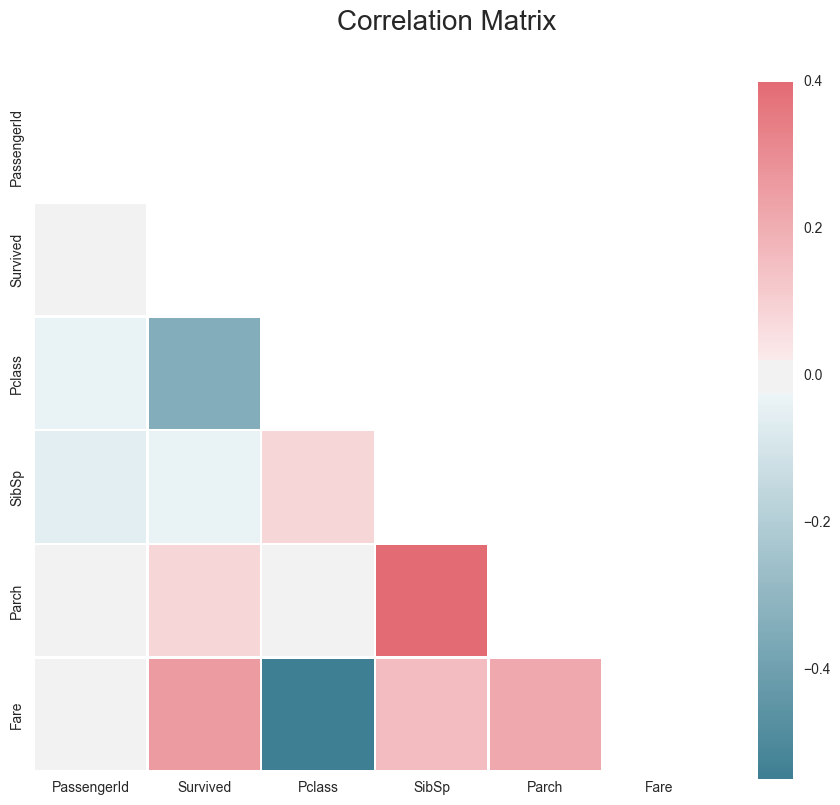

In [59]:
sns.set(style="white")
corr = data_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
v = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0, square=True, linewidth=1)
v = plt.suptitle("Correlation Matrix", fontsize=20)

Even though there is a relatively high correlation between Survived and Fare features (similar intensity exists between  and Pclassfeatures just with a negative correlation), I will not analyze Fare feature in further analysis due to my presumption that Fare is derived from class (the higher class - the more expensive tickets) and thus Fare provide very similar information as the Pclass feature.(I can be wrong here, but high correlation between Fare and Pclass also visible in the heatmap, partially confirms my pressumtion).

### Sex

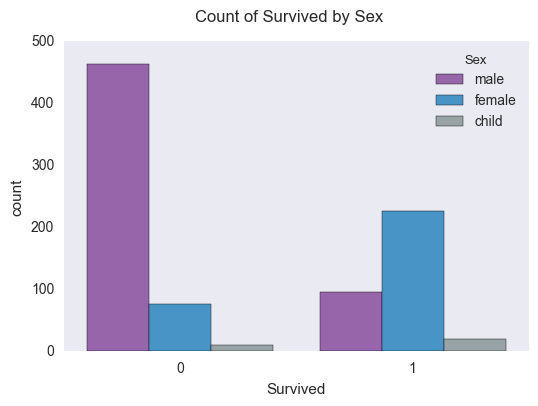

In [60]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#8d572e"]
sns.set_palette(flatui)
sns.set_style("dark")
v = sns.countplot(x="Survived", hue="Sex", data=data_df2, orient="v")
v = plt.suptitle("Count of Survived by Sex")

In [61]:
# return proportion of survivers (vs input feature, vs all survivers)
def get_proportions(df, feature):
    denominator =  df[[feature, "Survived"]].groupby([feature]).count()
    denominator2 = df["Survived"].sum()
    numerator = df[[feature, "Survived"]].groupby([feature]).sum()
    
    prop = np.round(numerator["Survived"].divide(denominator["Survived"])*100,2)
    prop.name = "Survived [%]"
    prop2 = np.round(numerator["Survived"].divide(denominator2)*100,2)
    prop2.name = "Survived / Total Survived [%]"
    proportions =  pd.concat([prop, prop2], axis=1)
    return proportions

proportion_sex = get_proportions(data_df2, "Sex")
print proportion_sex

        Survived [%]  Survived / Total Survived [%]
Sex                                                
child          66.67                           5.85
female         74.83                          66.08
male           17.17                          28.07


In the sample were clearly more mens than womens the proportion is almost 2:1.<br> 
~75% womens survived which is ~66% out of all survivers, opposite to that only ~17% mens survived which is ~28% out of all survivers. Group of childrens (<= 10 years) is minor group where ~67% childrens survived which is almost 6% out of all survivers.<br>
It seems obvious that males had noticeably lower chance to survive opposite to womens and childrens. (Which was anticipated.)

### Age

               Survived [%]  Survived / Total Survived [%]
Age                                                       
Unknown               29.38                          15.20
Baby                  66.67                           5.85
Child                 52.94                           5.26
Young                 42.67                           9.36
Younger Adult         35.56                          28.07
Older Adult           42.05                          34.80
Senior                22.73                           1.46


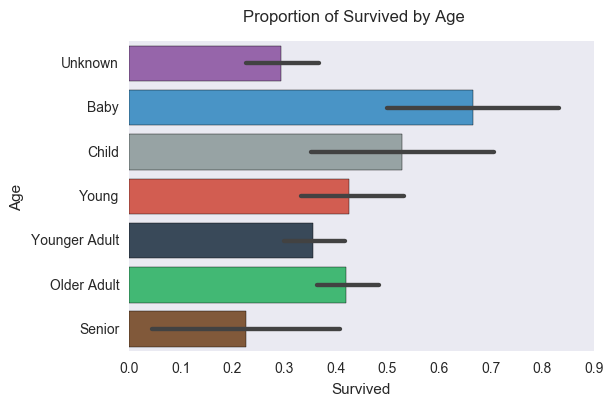

In [62]:
v = sns.barplot(x="Survived", y="Age", data=data_df, palette=flatui)
v = plt.suptitle("Proportion of Survived by Age")
proportion_age = get_proportions(data_df, "Age")
print proportion_age

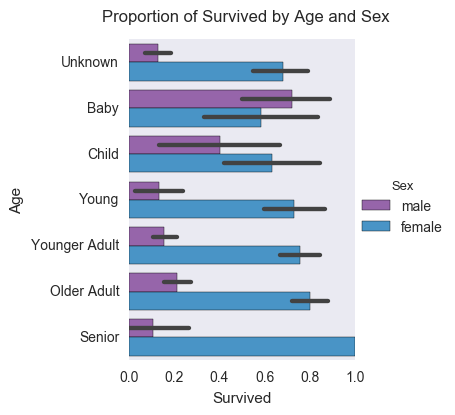

In [63]:
v = sns.factorplot(x="Survived", y="Age", hue="Sex", kind="bar", data=data_df, palette=flatui)
v = plt.suptitle("Proportion of Survived by Age and Sex", x= 0.58, y= 1.03)

Even though wide error lines, clearly best chance to survive had the babies and childrens (<=10 years). Relatively similar trend in survival proportion of females between all age categories. In babies and child category it seems that age does not have much strong effect - survival proportions are very similar. Males older than 10 years had drastically lower probability of survival in comparison to females.

### Pclass

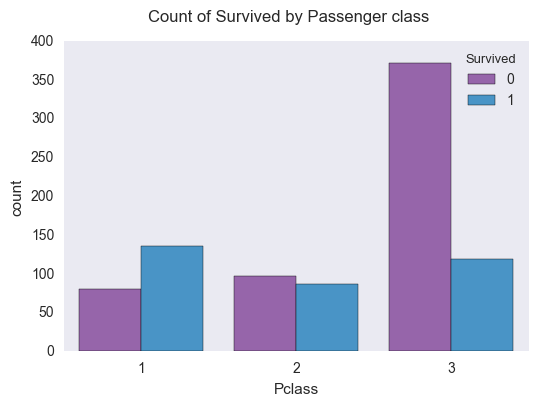

In [64]:
v = sns.countplot(x="Pclass", hue="Survived", data=data_df, orient="v" )
v = plt.suptitle("Count of Survived by Passenger class")

In [65]:
proportion_class = get_proportions(data_df, "Pclass")
print proportion_class

        Survived [%]  Survived / Total Survived [%]
Pclass                                             
1              62.96                          39.77
2              47.28                          25.44
3              24.24                          34.80


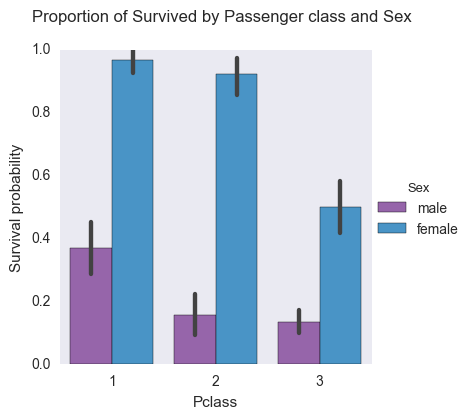

In [66]:
v = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data_df, kind="bar")
v = v.set_ylabels("Survival probability")
v = plt.suptitle("Proportion of Survived by Passenger class and Sex", y=1.04)

Along with decrease in class also survival probability falls down, which is observed for both males and females. Visualization indicates that people from higher class were more likely to survive.

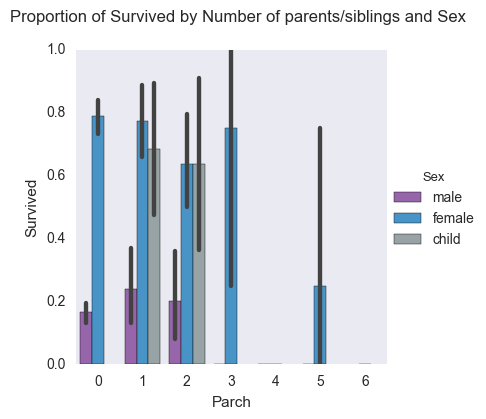

In [71]:
v = sns.factorplot(x="Parch", y="Survived", hue="Sex", data=data_df2, kind="bar")
v = plt.suptitle("Proportion of Survived by Number of parents/siblings and Sex", y=1.04)

In [70]:
proportion_parch = get_proportions(data_df, "Parch")
print proportion_parch

       Survived [%]  Survived / Total Survived [%]
Parch                                             
0             34.37                          68.13
1             55.08                          19.01
2             50.00                          11.70
3             60.00                           0.88
4              0.00                           0.00
5             20.00                           0.29
6              0.00                           0.00


Parch does not seem to have any significant impact on survival rate. The most common case of survivor is single (no childrens) female or female with one to three kids - which is consistent with earlier findings.

## Draw Conclusions

The key findings are:<br> 
* clearly better chance to survive had women and childrens (<= 10 years)<br>
* people from higher classes (1st and 2nd) were much likely to survive than people from 3rd class<br>
* number of parents/siblings (Parch feature) appears not having an important effect on survival rate <br>
* between other factors and survival rate seems to be weaker correlation<br>
<br>

All the findings above are based on the data sample consisting of 891 records out of 2224 = total number of passengers and crew (this number is an estimate). And so all of the findings are just estimates of actual characteristics. The sample size is big enough, in my opinion, so findings might be deviated due to not representative sample or insufficient methodology. Other issue might be not enough features that influence the survival feature, which could be tricky when creating a predictive model - there could help feature engeneering.
        

As a next step I would analyze the rest of the features, just in case I missed something or made a mistake in my judgments. After that, I would try to come up with a classification model (e.g. logistic regression) trying to predict which passengers are rather to survive and which are not. And also involve more advanced statistics and inferences about the dataset as it seems to me obvious that randomness played more than small role in case of who will survive. In other words, we can observe some general patterns (females and childrens were most frequent survivers) but when creating predictive model we have to deal with the question: Which particular child and which particular female could have survived? And this is a question of pure randomness, I think.<br>
Later on during modelling I would be interested in enginereed features as I am wondering about questions related to features engineering: Do enginereed features improving accuracy of predictions? Which engineered features provide the highest predictive power?

## Resources
1) http://seaborn.pydata.org/index.html <br>
2) https://docs.scipy.org/doc/numpy/index.html<br>
3) http://pandas.pydata.org/pandas-docs/stable/index.html<br>
4) https://docs.python.org/2/library/<br>
5) https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=table#matplotlib.pyplot.table<br>
6) https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame<br>
7) https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#loc-selection<br>
8) https://stackoverflow.com/questions/18062135/combining-two-series-into-a-dataframe-in-pandas<br>
9) https://www.kaggle.com/c/titanic
10) https://en.wikipedia.org/wiki/RMS_Titanic

Created by Martin Rypar <br>
v2.0, 16.08.2017<br>
Thank you for your feedback!